In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Modeli yükleme
model = load_model('pneumonia_detection_model.h5')

In [3]:
# Test verilerini yeniden ölçeklendirme
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
test_generator = test_datagen.flow_from_directory(
    'testForChestXray',  # test verilerinizin yolu
    target_size=(150, 150),
    batch_size=1,  # Her seferinde bir görüntü yükle
    class_mode='binary',
    shuffle=False
)

Found 100 images belonging to 2 classes.


In [5]:
# Modeli test etme
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

100/100 [==============================] - 3s 17ms/step - loss: 0.3135 - accuracy: 0.8700
Test Loss: 0.31353768706321716
Test Accuracy: 0.8700000047683716


1/1 [==============================] - 0s 460ms/step


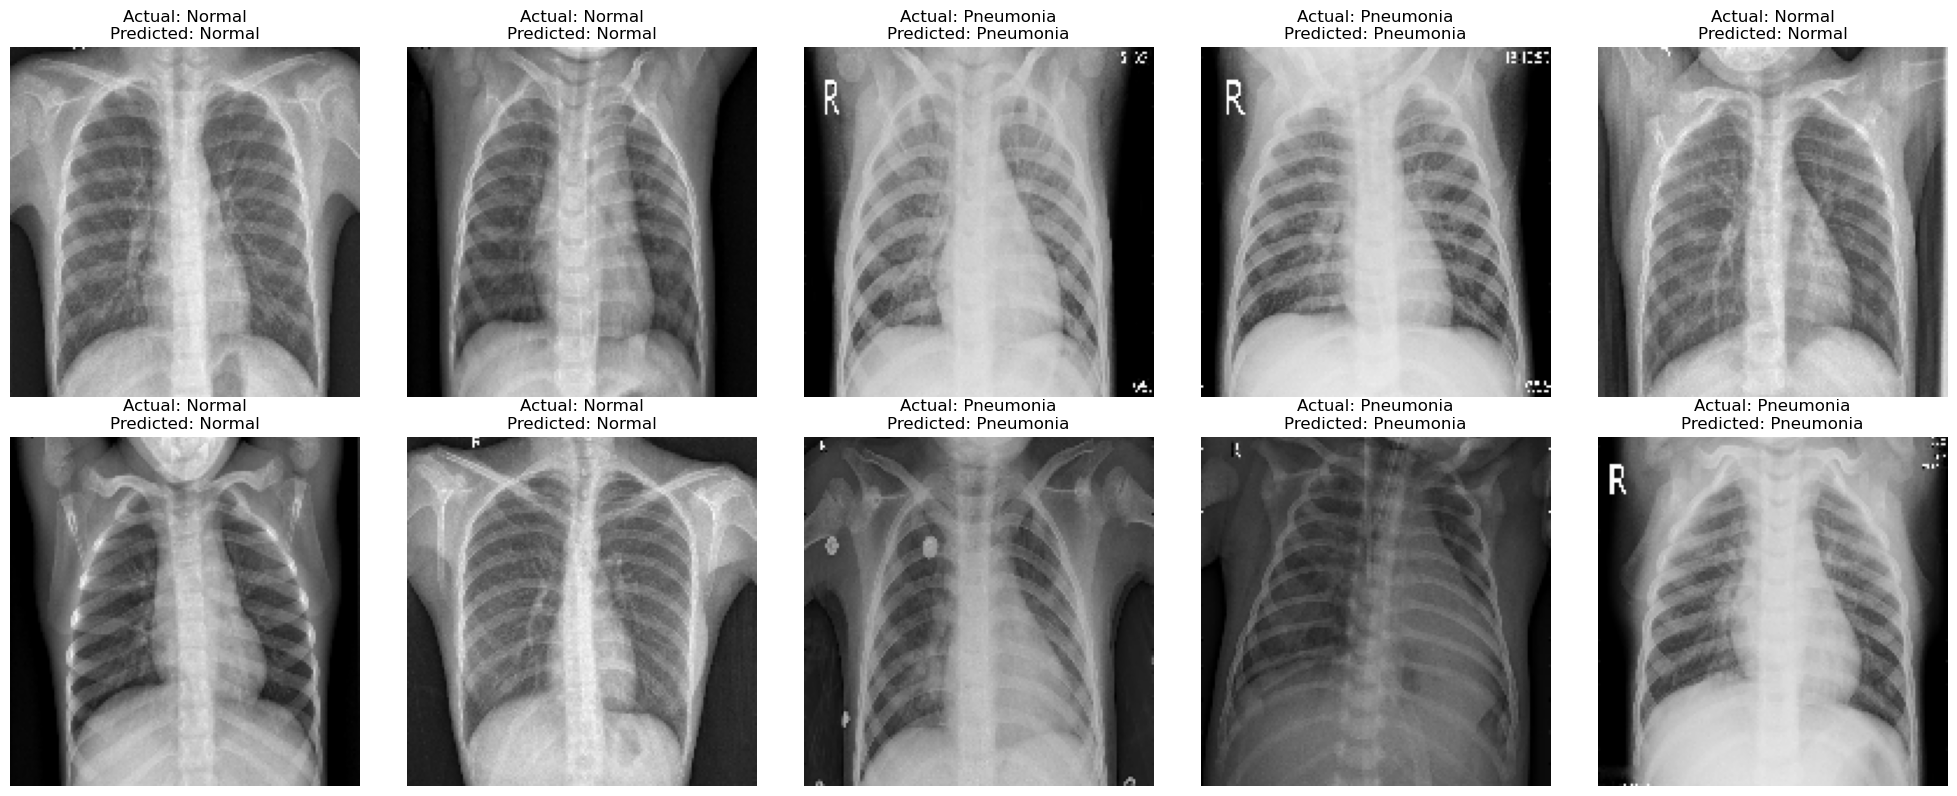

In [6]:
# Tüm test görüntülerini ve etiketlerini toplama
test_generator.reset()
all_images = []
all_labels = []
filenames = []

for i in range(len(test_generator)):
    img, label = test_generator.next()
    all_images.append(img)
    all_labels.append(label)
    filenames.append(test_generator.filenames[test_generator.batch_index - 1])

# Listeleri numpy dizilerine dönüştürme
all_images = np.array(all_images).reshape(len(test_generator), 150, 150, 3)
all_labels = np.array(all_labels).reshape(len(test_generator))

# Rastgele 10 örnek görüntü seçme
num_samples = 10
random_indices = random.sample(range(len(test_generator)), num_samples)
sample_images = all_images[random_indices]
sample_labels = all_labels[random_indices]

# Tahmin yapma
predictions = model.predict(sample_images)

# Görüntüleri ve tahminleri görselleştirme
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i in range(num_samples):
    axes[i].imshow(sample_images[i])
    axes[i].set_title(f"Actual: {'Pneumonia' if sample_labels[i] == 1 else 'Normal'}\nPredicted: {'Pneumonia' if predictions[i] > 0.5 else 'Normal'}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()